# Data Analysis of Building Energy Benchmarking Data

# Part 1: Data Cleaning and Preprocessing

## 1.1 Load and Inspect the Dataset

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
# read data intro dataframe

df = pd.read_csv("Building_Energy_Benchmarking.csv")

In [3]:
# display the head of the dataset

display(df.head())

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,26,1.5,1152308,506,6582,NaN,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,253,118.1,508594,4926,NaN,NaN,508594.0,236.0,2023,2023-21988603


In [4]:
# display the dataset's shape

display(df.shape)

(494, 31)

In [5]:
# display the dataset's columns

display(df.columns)

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

In [6]:
# display the dataset's data types

display(df.dtypes)

Property Id                                                                int64
Property Name                                                             object
Address 1                                                                 object
City                                                                      object
Postal Code                                                               object
Province                                                                  object
Primary Property Type - Self Selected                                     object
Number of Buildings                                                        int64
Year Built                                                                 int64
Property GFA - Self-Reported (m²)                                         object
ENERGY STAR Score                                                        float64
Site Energy Use (GJ)                                                      object
Weather Normalized Site Ener

In [7]:
# the shape, columns, and data types can also be gotten with info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

## 1.2 Handling Missing Data

In [8]:
# Calculate the percentage of missing data for each column

missing = {}

for column in df.columns:
    percent_null = (df[column].isnull().sum() / len(df)) * 100
    missing[column] = percent_null

display(missing)

{'Property Id': 0.0,
 'Property Name': 0.0,
 'Address 1': 0.0,
 'City': 0.0,
 'Postal Code': 0.0,
 'Province': 0.0,
 'Primary Property Type - Self Selected': 0.0,
 'Number of Buildings': 0.0,
 'Year Built': 0.0,
 'Property GFA - Self-Reported (m²)': 0.0,
 'ENERGY STAR Score': 66.59919028340082,
 'Site Energy Use (GJ)': 0.0,
 'Weather Normalized Site Energy Use (GJ)': 0.0,
 'Site EUI (GJ/m²)': 0.0,
 'Weather Normalized Site EUI (GJ/m²)': 0.0,
 'Source Energy Use (GJ)': 0.0,
 'Weather Normalized Source Energy Use (GJ)': 0.4048582995951417,
 'Source EUI (GJ/m²)': 0.0,
 'Weather Normalized Source EUI (GJ/m²)': 0.0,
 'Total GHG Emissions (Metric Tons CO2e)': 0.0,
 'Total GHG Emissions Intensity (kgCO2e/m²)': 0.0,
 'Direct GHG Emissions (Metric Tons CO2e)': 0.0,
 'Direct GHG Emissions Intensity (kgCO2e/m²)': 0.0,
 'Electricity Use - Grid Purchase (kWh)': 0.0,
 'Natural Gas Use (GJ)': 2.0242914979757085,
 'District Hot Water Use (GJ)': 96.96356275303644,
 'Electricity Use – Generated from Ons

In [9]:
# append columns with more than 40% missing values into a list

drop_columns = []

for key, value in missing.items():
    if value > 40:
        drop_columns.append(key)

drop_columns

['ENERGY STAR Score',
 'District Hot Water Use (GJ)',
 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)']

In [10]:
# drop columns with more than 40% missing values

df.drop(drop_columns, axis = 1, inplace = True)

In [11]:
# view count distribution of Weather Normalized Source Energy Use (GJ)

df['Weather Normalized Source Energy Use (GJ)'].value_counts()

Weather Normalized Source Energy Use (GJ)
1139         2
2099         2
1012         2
10,631.70    1
5,621.60     1
            ..
2,260        1
554.7        1
4,453.70     1
276.8        1
329          1
Name: count, Length: 489, dtype: int64

In [12]:
# view count distribution of Natural Gas Use (GJ)

df['Natural Gas Use (GJ)'].value_counts()

Natural Gas Use (GJ)
5,754.10    2
840         2
1034        2
3226        2
5453        1
           ..
6,219.40    1
1,196.80    1
2,770.30    1
191.9       1
244         1
Name: count, Length: 480, dtype: int64

In [13]:
# Since Weather Normalized Source Energy Use (GJ) and Natural Gas Use (GJ) have more than one mode, 
# replace missing values in the column with the first mode

df.fillna({'Weather Normalized Source Energy Use (GJ)': df['Weather Normalized Source Energy Use (GJ)'].mode()[0],
           'Natural Gas Use (GJ)': df['Natural Gas Use (GJ)'].mode()[0]}, axis = 0, inplace = True)

In [14]:
# Calculate the updated percentage of missing data for each column

missing = {}

for column in df.columns:
    percent_null = (df[column].isnull().sum() / len(df)) * 100
    missing[column] = percent_null

display(missing)

{'Property Id': 0.0,
 'Property Name': 0.0,
 'Address 1': 0.0,
 'City': 0.0,
 'Postal Code': 0.0,
 'Province': 0.0,
 'Primary Property Type - Self Selected': 0.0,
 'Number of Buildings': 0.0,
 'Year Built': 0.0,
 'Property GFA - Self-Reported (m²)': 0.0,
 'Site Energy Use (GJ)': 0.0,
 'Weather Normalized Site Energy Use (GJ)': 0.0,
 'Site EUI (GJ/m²)': 0.0,
 'Weather Normalized Site EUI (GJ/m²)': 0.0,
 'Source Energy Use (GJ)': 0.0,
 'Weather Normalized Source Energy Use (GJ)': 0.0,
 'Source EUI (GJ/m²)': 0.0,
 'Weather Normalized Source EUI (GJ/m²)': 0.0,
 'Total GHG Emissions (Metric Tons CO2e)': 0.0,
 'Total GHG Emissions Intensity (kgCO2e/m²)': 0.0,
 'Direct GHG Emissions (Metric Tons CO2e)': 0.0,
 'Direct GHG Emissions Intensity (kgCO2e/m²)': 0.0,
 'Electricity Use - Grid Purchase (kWh)': 0.0,
 'Natural Gas Use (GJ)': 0.0,
 'Year Ending': 0.0,
 'Unique ID': 0.0}

## 1.3 Extracting and Cleaning Data Using Regex

### Extract numeric values from text-based numeric columns (e.g., Property GFA, Energy Use, Emissions).

In [15]:
# view head of df to observe text-based numeric columns

pd.set_option('display.max_columns', None)

df.head()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,6780,7554,3.69,4.11,8209,9029,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,8656,9266,1.11,1.19,12202,12761,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,4014,4364,0.60,0.65,6254,6707,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,11237,12229,0.64,0.70,16882,18157,0.97,1.04,1293,74.0,26,1.5,1152308,506,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,6757,7366,3.15,3.44,8572,9154,4.00,4.27,568,265.2,253,118.1,508594,4926,2023,2023-21988603


In [16]:
# create list of text-based numeric columns

cols = ['Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)', 
          'Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)',
         'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)']

In [17]:
# extract numeric values from text-based numeric columns

for col in cols:
    df[col] = df[col].apply(lambda x: re.sub('[^0-9.]', '', x))

In [18]:
# view head of extracted numeric columns

df.head()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,6780,7554,3.69,4.11,8209,9029,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,8656,9266,1.11,1.19,12202,12761,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,4014,4364,0.60,0.65,6254,6707,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,11237,12229,0.64,0.70,16882,18157,0.97,1.04,1293,74.0,26,1.5,1152308,506,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,6757,7366,3.15,3.44,8572,9154,4.00,4.27,568,265.2,253,118.1,508594,4926,2023,2023-21988603


### Standardize Postal Codes to follow the Canadian format (A1A 1A1)

In [19]:
# define function to standardize Postal Codes to follow the Canadian format (A1A 1A1)

def postal(code):
    code = re.findall(r'\w\w\w', code)
    code = ' '.join(code)
    code = code.upper()
    
    code = code.replace('O', '0')
    
    return code

In [20]:
df['Postal Code'] = df['Postal Code'].apply(lambda x: postal(x))

### Clean and extract meaningful text from Property Names and Addresses

In [21]:
# remove city and postal code from Address

df['Address 1'] = df['Address 1'].str.replace(r', Calgary.*', '', regex=True)

In [22]:
# change text format of addresses to title case

df['Address 1'] = df['Address 1'].str.title()

In [23]:
# replace abbreviations with full meanings

df['Address 1'] = df['Address 1'].replace({'Av': 'Avenue', 'Ave': 'Avenue', 'Bv': 'Boulevard', 
                                               'Blvd': 'Boulevard', 'Dr': 'Drive', 'Rd': 'Road', 
                                               'St': 'Street', 'Tr': 'Trail', 'Nw': 'NW', 
                                               'Ne': 'NE', 'Sw': 'SW', 'Se': 'SE'}, 
                                              regex=True)

In [24]:
df['Address 1']

0           9009 Fairmount Drive SE
1                 2924 11 Street NE
2                  315 10 Avenue SE
3                   133 6 Avenue SE
4           2201 Portland Street SE
                   ...             
489                311 34 Avenue SE
490               4705 76 Avenue SE
491     1940 Westmount Boulevard NW
492              2607 106 Avenue SW
493    10071 Hidden Valley Drive NW
Name: Address 1, Length: 494, dtype: object

In [25]:
# create column of quadrants

df['Quadrant'] = df['Address 1'].str.extract(r'(NW|NE|SW|SE)')

In [26]:
df['Quadrant']

0      SE
1      NE
2      SE
3      SE
4      SE
       ..
489    SE
490    SE
491    NW
492    SW
493    NW
Name: Quadrant, Length: 494, dtype: object

### Ensure extracted values are properly converted to numerical types for analysis

In [27]:
# display the dataset's data types

display(df.dtypes)

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)              object
Site Energy Use (GJ)                           object
Weather Normalized Site Energy Use (GJ)        object
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                         object
Weather Normalized Source Energy Use (GJ)      object
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

In [28]:
# Ensure extracted values are properly converted to numerical types for analysis.

df[cols] = df[cols].apply(pd.to_numeric)

In [29]:
# display the dataset's data types

display(df.dtypes)

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)             float64
Site Energy Use (GJ)                          float64
Weather Normalized Site Energy Use (GJ)       float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        float64
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

# Part 2: Exploratory Data Analysis (EDA) and Aggregations

## 2.1 Statistical Summary

In [30]:
# Generate summary statistics for numerical features using extracted data

df.describe()

,Property Id,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending
count,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,4752.556883,8265.670040,8397.193117,1.774798,1.810324,10590.527733,10212.804049,2.282753,2.319717,724.276316,158.671660,281.868826,63.821862,6.011028e+05,5509.848381,2020.995951
std,5.659556e+06,0.278281,25.159568,10128.320688,19733.748811,19877.336939,1.306700,1.331529,23438.866328,22869.729340,1.597846,1.622897,1490.433401,109.472637,884.613506,56.835735,1.184414e+06,17221.116059,1.414208
min,6.169481e+06,1.000000,1896.000000,113.000000,141.000000,146.000000,0.060000,0.060000,237.000000,146.000000,0.110000,0.110000,15.000000,10.200000,0.000000,0.000000,1.076580e+04,3.000000,2019.000000
25%,9.563763e+06,1.000000,1970.000000,1096.650000,1232.825000,1256.150000,0.990000,1.000000,1601.525000,1557.250000,1.312500,1.350000,113.850000,93.100000,43.000000,33.325000,1.074446e+05,861.050000,2020.000000
50%,9.997794e+06,1.000000,1978.000000,1806.750000,2555.650000,2572.500000,1.290000,1.310000,3238.600000,3127.500000,1.680000,1.690000,228.400000,117.600000,78.700000,43.900000,2.237719e+05,1532.400000,2021.000000
75%,2.198860e+07,1.000000,1996.000000,4257.900000,7999.050000,8006.575000,2.065000,2.110000,10242.400000,9637.275000,2.622500,2.652500,696.550000,186.975000,247.425000,74.050000,5.492725e+05,4816.200000,2022.000000
max,2.198863e+07,3.000000,2018.000000,85941.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.786193e+06,238415.000000,2023.000000


## Identify and explain key observations (e.g., outliers, mean vs. median differences)

It can be observed that the mean is greater than the median in all the energy use and emissions columns, including their intensities, which indicates their distributions are right skewed. They also have high standard deviations, whch is a sign that the distributions have large variations about their means. It is also a sign of potential outliers in the data.

## 2.2 Aggregations

In [31]:
# Compute the average Energy Use Intensity (EUI) by Property Type

df.groupby('Primary Property Type - Self Selected')[['Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
                                                   'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)']].agg('mean')

,Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²)
Primary Property Type - Self Selected,,,,
Distribution Center,3.286000,3.284000,3.496000,3.492000
Fire Station,1.208827,1.223799,1.572849,1.587263
Fitness Center/Health Club/Gym,4.385000,4.472250,5.306750,5.398000
Heated Swimming Pool,4.805333,4.924000,5.895333,6.020000
Ice/Curling Rink,2.182200,2.220800,2.862400,2.903400
Indoor Arena,1.106000,1.148000,1.358000,1.404000
Mixed Use Property,0.458000,0.470000,0.522000,0.534000
Museum,1.584000,1.652000,2.050000,2.124000
Non-Refrigerated Warehouse,0.768000,0.781333,1.039333,1.052667


In [32]:
# Compute the total Greenhouse Gas (GHG) emissions by year

df.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].agg('sum')

Year Ending
2019    75605.4
2020    66617.2
2021    68136.9
2022    72301.0
2023    75132.0
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

### Identify the top 5 properties with the highest total energy consumption.

In [33]:
# top 5 properties with highest total energy consumption

top_5_properties = df.groupby('Property Name')['Site Energy Use (GJ)'].agg('sum').sort_values(ascending = False)
display(top_5_properties[:5])

Property Name
Stoney Transit Facility                               726554.8
Municipal Complex                                     406124.1
Village Square Leisure Centre                         396268.1
Southland Leisure Centre                              245215.1
Foothills Aquatic Centre and Bauer and Bush Arenas    122386.6
Name: Site Energy Use (GJ), dtype: float64

## 2.3 Detecting Outliers Using Regex and IQR

### Use Regex only to:
- Identify values that do not conform to expected numeric formats. 
- Remove or correct incorrectly formatted numeric values.

In [34]:
# create list of columns to check

cols = ['Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)',
       'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)',
       'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)']

df[cols].dtypes

Property GFA - Self-Reported (m²)             float64
Site Energy Use (GJ)                          float64
Weather Normalized Site Energy Use (GJ)       float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        float64
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric Tons CO2e)        float64
Total GHG Emissions Intensity (kgCO2e/m²)     float64
Direct GHG Emissions (Metric Tons CO2e)       float64
Direct GHG Emissions Intensity (kgCO2e/m²)    float64
Electricity Use - Grid Purchase (kWh)         float64
Natural Gas Use (GJ)                          float64
dtype: object

Since the columns allhave numerical data types, it means the values all conform to expected numeric formats

### Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e)

In [35]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
Q3 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)

print('First Quartile: {}'.format(Q1))
print('Third quartile: {}'.format(Q3))

First Quartile: 113.85
Third quartile: 696.55


In [36]:
# Calculate interquartile range

IQR = Q3 - Q1
print('Interquartile range: {}'.format(IQR))

Interquartile range: 582.6999999999999


In [37]:
# Calculate lower and upper bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound: {}'.format(lower_bound))
print('Upper Bound: {}'.format(upper_bound))

Lower Bound: -760.1999999999999
Upper Bound: 1570.6


In [38]:
# Identify outliers

outliers = df[(df['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound) | (df['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)]

print(f"Number of outliers in Total GHG Emissions (Metric Tons CO2e): {outliers.shape[0]}")

display(outliers)

Number of outliers in Total GHG Emissions (Metric Tons CO2e): 46


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID,Quadrant
16,10170296,Emergency Operations Centre,673 1 Street NE,Calgary,T2E 6R2,Alberta,Office,1,2012,5213.0,20152.0,20811.0,3.87,3.99,33436.0,34135.0,6.41,6.55,2931.0,562.1,230.0,44.0,4356404.0,4469.0,2023,2023-10170296,NE
57,9492075,Foothills Aquatic Centre and Bauer and Bush Ar...,2424 University Drive NW,Calgary,T2N 3Y9,Alberta,Ice/Curling Rink,2,1963,8558.0,26455.0,27855.0,3.09,3.25,34955.0,36439.0,4.08,4.26,2444.0,285.5,898.0,104.9,2493859.0,17477.0,2023,2023-9492075,NW
69,21988597,"Manchester Building E - North and South Tower,...",2808 Spiller Road SE,Calgary,T2G 4H3,Alberta,Office,3,1956,6988.0,18948.0,20008.0,2.71,2.86,26496.0,27620.0,3.79,3.95,1979.0,283.3,545.0,78.1,2312959.0,10621.0,2023,2023-21988597,SE
71,9265818,Max Bell and Ken Bracko Arenas,1001 Barlow Trail SE,Calgary,T2E 6S2,Alberta,Ice/Curling Rink,1,1990,12856.0,25327.0,25327.0,1.97,1.97,35013.0,35013.0,2.72,2.72,2583.0,200.9,756.0,58.8,2946436.0,14720.0,2023,2023-9265818,SE
73,8854298,Municipal Complex,800 Macleod Trailail SE,Calgary,T2P 2M5,Alberta,Office,1,1982,85941.0,79343.0,84782.0,0.92,0.99,122524.0,129236.0,1.43,1.50,9678.0,112.6,60.0,0.7,9618602.0,1166.0,2023,2023-8854298,SE
87,8854296,Andrew Davison,133 6 Avenue SE,Calgary,T2G 0G2,Alberta,Office,1,1979,17468.0,14092.5,13802.8,0.81,0.79,21279.1,20904.9,1.22,1.20,1624.9,93.0,48.9,2.8,1252457.8,951.3,2019,2019-8854296,SE
90,8854298,Municipal Complex,800 Macleod Trailail SE,Calgary,T2P 2M5,Alberta,Office,1,1982,85941.0,87455.3,85739.7,1.02,1.00,138141.5,135868.5,1.61,1.58,10999.9,128.0,59.1,0.7,9786193.4,1150.4,2019,2019-8854298,SE
92,9265818,Max Bell and Ken Bracko Arenas,1001 Barlow Trail SE,Calgary,T2E 6S2,Alberta,Ice/Curling Rink,1,1990,12856.0,28552.5,27852.4,2.22,2.17,38068.1,37361.0,2.96,2.91,2802.5,218.0,967.2,75.2,2698969.1,18836.6,2019,2019-9265818,SE
97,9492075,Foothills Aquatic Centre and Bauer and Bush Ar...,2424 University Drive NW,Calgary,T2N 3Y9,Alberta,Ice/Curling Rink,2,1963,8558.0,27132.2,26637.8,3.17,3.11,35568.9,35069.6,4.16,4.10,2575.5,300.9,951.9,111.2,2387651.3,18537.0,2019,2019-9492075,NW
117,9601861,Whitehorn Multi-Services Centre,3705 35 Street NE,Calgary,T1Y 6C2,Alberta,Non-Refrigerated Warehouse,1,1982,22684.0,16730.3,16482.8,0.74,0.73,26062.5,25812.5,1.15,1.14,2109.5,93.0,284.1,12.5,2684387.0,5532.7,2019,2019-9601861,NE


### Replace outliers with the median value for that property type

In [39]:
# group the dataset by property type to determine the median value per property type and put into a dataframe

df_median = df.groupby('Primary Property Type - Self Selected')['Total GHG Emissions (Metric Tons CO2e)'].agg('median').reset_index(name = 'median')

display(df_median)

,Primary Property Type - Self Selected,median
0,Distribution Center,7768.20
1,Fire Station,140.50
2,Fitness Center/Health Club/Gym,790.45
3,Heated Swimming Pool,693.70
4,Ice/Curling Rink,916.55
5,Indoor Arena,1372.00
6,Mixed Use Property,65.00
7,Museum,287.10
8,Non-Refrigerated Warehouse,550.90
9,Office,356.20


In [40]:
# merge dataframes to create a column of median values in the main dataframe

df = pd.merge(df, df_median, on = 'Primary Property Type - Self Selected', how = 'left')

In [41]:
# determine the indexes of the outliers

ind = outliers.index
ind

Index([ 16,  57,  69,  71,  73,  87,  90,  92,  97, 117, 135, 145, 155, 156,
       170, 173, 189, 191, 196, 216, 234, 244, 255, 269, 272, 290, 293, 296,
       298, 307, 318, 325, 345, 362, 372, 384, 398, 401, 409, 413, 433, 447,
       457, 468, 482, 485],
      dtype='int64')

In [42]:
# replace outliers in Total GHG Emissions (Metric Tons CO2e) column by their respective median

df.loc[ind, 'Total GHG Emissions (Metric Tons CO2e)'] = df.loc[ind, 'median']

display(df.loc[ind, 'Total GHG Emissions (Metric Tons CO2e)'])

16      356.20
57      916.55
69      356.20
71      916.55
73      356.20
87      356.20
90      356.20
92      916.55
97      916.55
117     550.90
135     356.20
145    7768.20
155    1372.00
156     356.20
170     790.45
173     790.45
189     356.20
191     916.55
196     916.55
216     550.90
234     356.20
244    7768.20
255     356.20
269     790.45
272     790.45
290     790.45
293    7768.20
296     790.45
298     550.90
307     356.20
318     356.20
325     916.55
345     550.90
362     356.20
372    7768.20
384     356.20
398     790.45
401     790.45
409     916.55
413     916.55
433     550.90
447     356.20
457    7768.20
468     356.20
482     790.45
485     790.45
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

# Part 3: Data Visualization

## 3.1 Time-Series Visualization

### Plot the yearly trend of average Site Energy Use Intensity (EUI)

In [43]:
# group the average Site Energy Use Intensity (EUI) by year

avg_site_eui = df.groupby('Year Ending')['Site EUI (GJ/m²)'].agg('mean').sort_index()
avg_site_eui

Year Ending
2019    1.981313
2020    1.696869
2021    1.681515
2022    1.781616
2023    1.732245
Name: Site EUI (GJ/m²), dtype: float64

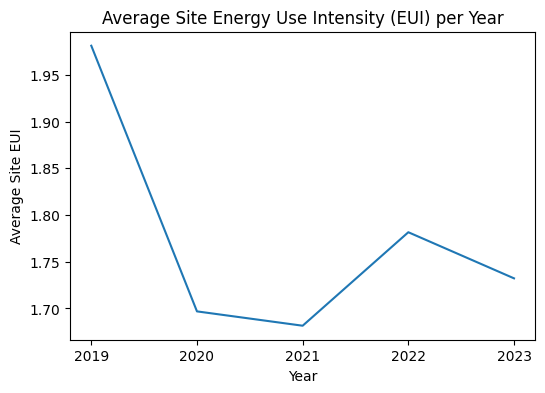

In [44]:
# plot the yearly trend of average Site Energy Use Intensity (EUI)

plt.figure(figsize=(6, 4))
plt.plot(avg_site_eui.index, avg_site_eui.values)
plt.xticks(avg_site_eui.index)
plt.title("Average Site Energy Use Intensity (EUI) per Year")
plt.xlabel("Year")
plt.ylabel("Average Site EUI")
plt.show()

### Highlight any significant increases or decreases in energy usage

The trend above shows that the energy usage had a sharp decrease from 2019 to 2020, followed by a slight decrease in 2021. The usage then increased in 2022, before having another decrease in 2023.

## 3.2 Comparative Bar Charts

- Create a bar chart showing the top 10 buildings with the highest GHG emissions.
- Annotate the bar chart with emission values.

In [45]:
# top 10 buildings with the highest GHG emissions

buildings = df.groupby('Property Name')['Total GHG Emissions (Metric Tons CO2e)'].agg('sum').sort_values(ascending = False)

top_10_buildings = buildings[:10]
display(top_10_buildings)

Property Name
Stoney Transit Facility                  38841.0
Calgary Soccer Centre and Annex           6866.4
Water Centre                              6473.9
Andrew Davison                            6045.8
Jimmie Condon and Rose Kohn Arenas        5498.4
Thornhill Aquatic & Recreation Centre     5437.6
Henry Viney and Stew Hendry Arenas        5337.3
Ad Valorem                                5173.5
East Calgary WMF Building S and T         5157.9
Max Bell and Ken Bracko Arenas            5100.1
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

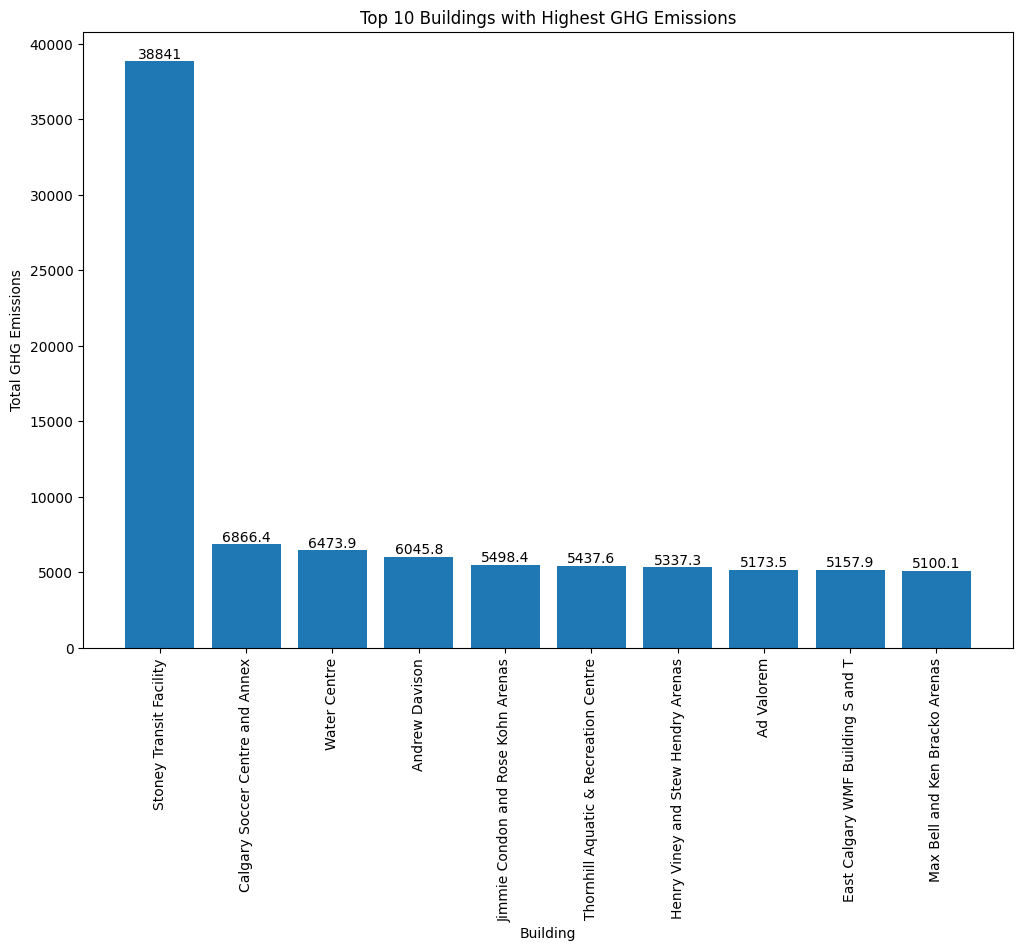

In [46]:
# plot bar chart

plt.figure(figsize=(12, 8))
bar = plt.bar(top_10_buildings.index, top_10_buildings.values)
plt.title("Top 10 Buildings with Highest GHG Emissions")
plt.xlabel("Building")
plt.ylabel("Total GHG Emissions")
plt.bar_label(bar)
plt.xticks(rotation = 90)
plt.show()

## 3.3 Heatmap Visualization

### Create a heatmap of energy usage intensity (Site EUI (GJ/m2)) across different property types

In [47]:
# create pivot table of data to be used for heatmap

pivot = df.pivot_table(index = 'Primary Property Type - Self Selected', values = 'Site EUI (GJ/m²)', aggfunc="sum")
pivot

,Site EUI (GJ/m²)
Primary Property Type - Self Selected,
Distribution Center,16.43
Fire Station,216.38
Fitness Center/Health Club/Gym,175.40
Heated Swimming Pool,72.08
Ice/Curling Rink,109.11
Indoor Arena,5.53
Mixed Use Property,2.29
Museum,7.92
Non-Refrigerated Warehouse,11.52


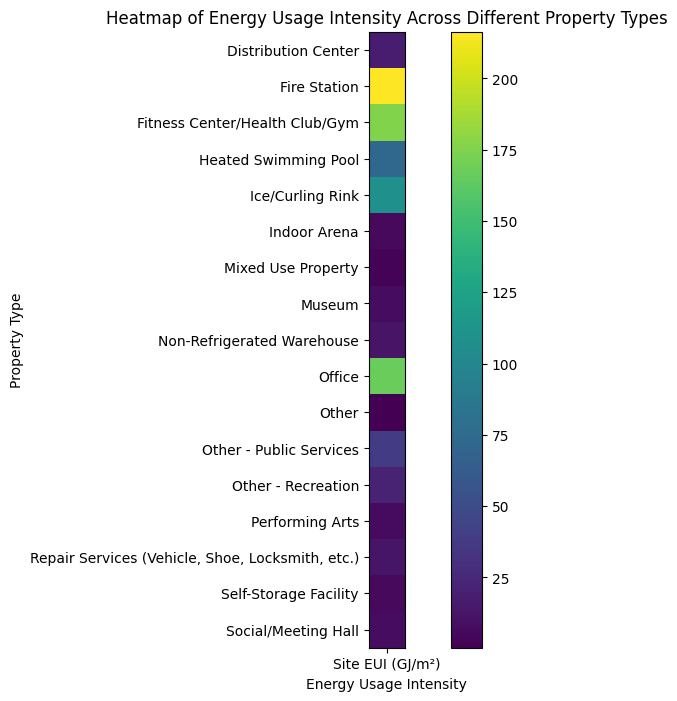

In [48]:
# plot heatmap

fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(pivot)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(pivot.columns)), labels=pivot.columns,
              ha="center", rotation_mode="anchor")

ax.set_yticks(range(len(pivot.index)), labels=pivot.index,
              ha="right", rotation_mode="anchor")

ax.set_title("Heatmap of Energy Usage Intensity Across Different Property Types")
ax.set_xlabel("Energy Usage Intensity")
ax.set_ylabel("Property Type")
ax.figure.colorbar(im)
plt.show()

#### Another way to observe the distribution of the energy usage intensity (Site EUI (GJ/m2)) across different property types would be to split Site EUI (GJ/m2) into bins to get a categorical column and then plot a heatmap for the different property types across the bins

In [49]:
# print the minimum and maximum values of Site EUI (GJ/m2) to determine the bumber of bins to use

print('Minimum: {}'.format(df['Site EUI (GJ/m²)'].min()))
print('Maximum: {}'.format(df['Site EUI (GJ/m²)'].max()))

Minimum: 0.06
Maximum: 8.43


Based on the minimum and maximum values, 10 bins would be a good number to use

In [50]:
# first split the Site EUI (GJ/m2) into bins to get a categorical column

df['site_eui_bins'] = pd.cut(df['Site EUI (GJ/m²)'], range(10))
df['site_eui_bins']

0      (3, 4]
1      (1, 2]
2      (0, 1]
3      (0, 1]
4      (3, 4]
        ...  
489    (1, 2]
490    (1, 2]
491    (2, 3]
492    (1, 2]
493    (1, 2]
Name: site_eui_bins, Length: 494, dtype: category
Categories (9, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (5, 6] < (6, 7] < (7, 8] < (8, 9]]

In [51]:
# observe count distribution of bins

df['site_eui_bins'].value_counts()

site_eui_bins
(1, 2]    235
(0, 1]    129
(2, 3]     56
(3, 4]     38
(5, 6]     15
(4, 5]     12
(6, 7]      7
(7, 8]      1
(8, 9]      1
Name: count, dtype: int64

In [52]:
# perform groupby to get count of site EUI bin per property type

df_heatmap = df.groupby(['Primary Property Type - Self Selected', 'site_eui_bins'])['Site EUI (GJ/m²)'].agg('count').reset_index(name = 'count')
df_heatmap

,Primary Property Type - Self Selected,site_eui_bins,count
0,Distribution Center,"(0, 1]",0
1,Distribution Center,"(1, 2]",1
2,Distribution Center,"(2, 3]",1
3,Distribution Center,"(3, 4]",2
4,Distribution Center,"(4, 5]",0
...,...,...,...
148,Social/Meeting Hall,"(4, 5]",0
149,Social/Meeting Hall,"(5, 6]",0
150,Social/Meeting Hall,"(6, 7]",0
151,Social/Meeting Hall,"(7, 8]",0


In [53]:
# create pivot table of data to be used for heatmap

pivot = df_heatmap.pivot_table(index = 'Primary Property Type - Self Selected', columns = 'site_eui_bins', values = 'count')
pivot

site_eui_bins,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]"
Primary Property Type - Self Selected,,,,,,,,,
Distribution Center,0,1,1,2,0,1,0,0,0
Fire Station,36,142,1,0,0,0,0,0,0
Fitness Center/Health Club/Gym,0,2,5,11,7,10,3,1,1
Heated Swimming Pool,0,0,3,1,3,4,4,0,0
Ice/Curling Rink,1,18,26,5,0,0,0,0,0
Indoor Arena,2,3,0,0,0,0,0,0,0
Mixed Use Property,5,0,0,0,0,0,0,0,0
Museum,0,5,0,0,0,0,0,0,0
Non-Refrigerated Warehouse,14,1,0,0,0,0,0,0,0


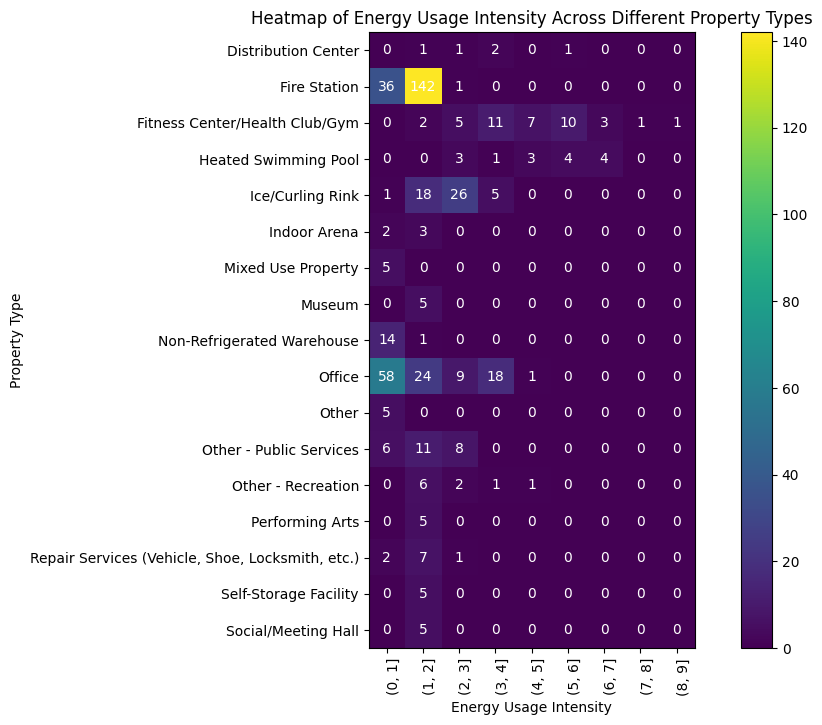

In [54]:
# plot heatmap

fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(pivot)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(pivot.columns)), labels=pivot.columns,
              rotation=90, ha="right", rotation_mode="anchor")

ax.set_yticks(range(len(pivot.index)), labels=pivot.index,
              ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        text = ax.text(j, i, pivot.iloc[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Heatmap of Energy Usage Intensity Across Different Property Types")
ax.set_xlabel("Energy Usage Intensity")
ax.set_ylabel("Property Type")
ax.figure.colorbar(im)
plt.show()

# Part 4: Further Analysis

## 4.1 Correlation Analysis
- Compute and visualize the correlation matrix between energy consumption, emissions, and building size.
- Identify any strong correlations and explain their implications.

In [55]:
# create list of correlation matrix columns 

corr_cols = ['Site EUI (GJ/m²)', 'Source EUI (GJ/m²)', 'Total GHG Emissions (Metric Tons CO2e)', 
             'Direct GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']

In [56]:
# calculate correlation using Pearson's correlation coefficient

corr = df[corr_cols].corr()

display(corr)

,Site EUI (GJ/m²),Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (m²)
Site EUI (GJ/m²),1.000000,0.984027,0.269227,0.385833,-0.012733
Source EUI (GJ/m²),0.984027,1.000000,0.232817,0.324558,-0.015831
Total GHG Emissions (Metric Tons CO2e),0.269227,0.232817,1.000000,0.817244,0.478433
Direct GHG Emissions (Metric Tons CO2e),0.385833,0.324558,0.817244,1.000000,0.401765
Property GFA - Self-Reported (m²),-0.012733,-0.015831,0.478433,0.401765,1.000000


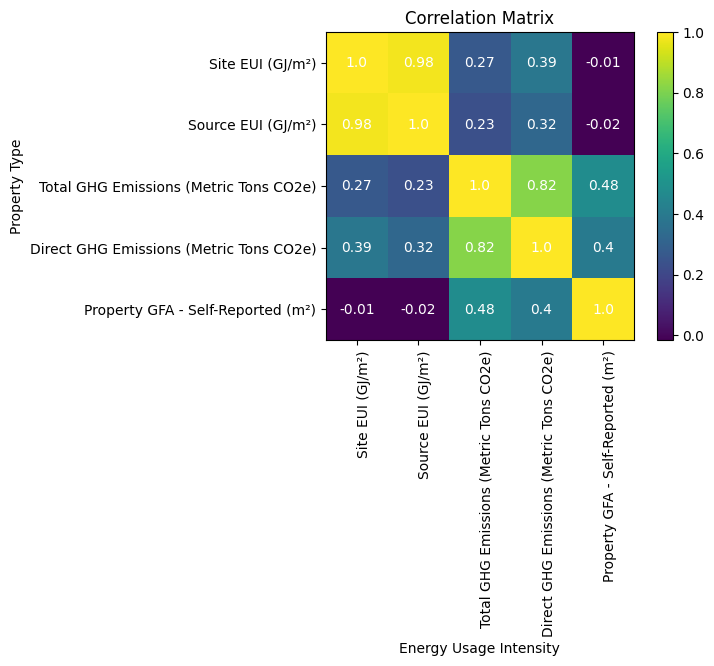

In [57]:
# visualize correlation matrix

fig, ax = plt.subplots(figsize=(6, 4))

im = ax.imshow(corr)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(corr.columns)), labels=corr.columns,
              rotation=90, ha="right", rotation_mode="anchor")

ax.set_yticks(range(len(corr.index)), labels=corr.index,
              ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, round(corr.iloc[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("Correlation Matrix")
ax.set_xlabel("Energy Usage Intensity")
ax.set_ylabel("Property Type")
ax.figure.colorbar(im)
plt.show()

The strongest correlation is between SIte EUI and Source EUI (0.98). There is also a strong correlation between Total GHG Emissions and Direct GHG Emissions (0.82). This means there are strong linear relationships between the two sets of features. There are average correlations between Property GFA and Total GHG Emissions (0.48) as well as Direct GHG Emissions (0.4), meaning building size has some form of relationship with both total and direct GHG emissions. The low correlations between energy consumption and the other variables show that energy consumption has weak relationships with Total GHG Emissions (0.27) and Direct GHG Emissions (0.39), while it has little to no relationship with building size (-0.01).

## 4.2 Hypothesis Testing

- Conduct a t-test comparing the average Energy Star Score between two different property types (e.g., Offices vs. Residential buildings)

- Interpret the results and discuss statistical significance.

#### Since the energy star score column was dropped earlier due to the large percentage of missing data, the t-test would be conducted to compare the site energy use between two different property types instead

Define Null and Alternate Hypotheses

- Null Hypothesis: There is no significant difference between two selected property types

- Alternate Hypothesis: There is a significant difference between two selected property types

In [58]:
# define function to compute the t-test of site energy use between property types using a significance level of 0.05

from scipy.stats import ttest_ind

def ttest(df, type1, type2, site_energy_use):
  df1 = df[df['Primary Property Type - Self Selected'] == type1]
  df2 = df[df['Primary Property Type - Self Selected'] == type2]

  #determine the pvalue of the t-test

  test = ttest_ind(df1[site_energy_use], df2[site_energy_use])

  print('The pvalue of the t-test is: {}'.format(test.pvalue))

  if test.pvalue < 0.05:
    return('There is a significant difference between the site energy use of {} and {}'.format(type1, type2))
  else:
    return('There is no significant difference between the site energy use of {} and {}'.format(type1, type2))

In [59]:
# test the function on Winter Emergency and Women Emergency shelter types

ttest(df, 'Distribution Center', 'Office', 'Site Energy Use (GJ)')

The pvalue of the t-test is: 2.2510361322746928e-27


'There is a significant difference between the site energy use of Distribution Center and Office'

Since the p value is less than 0.05, we reject the null hypothesis which thereby means there is a significant difference between the site energy use of Distribution Center and Office

# Part 5: Reporting and Insights

## Key trends in energy consumption and efficiency

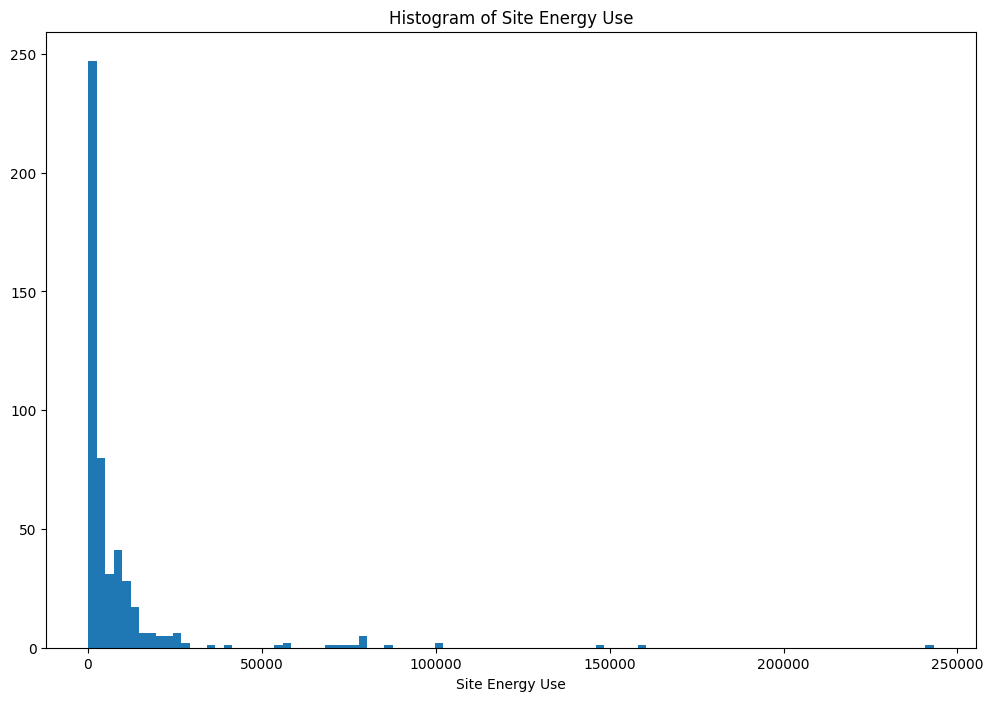

In [60]:
# plot a histogram of Site Energy Use 

plt.figure(figsize=(12, 8))
plt.hist(df['Site Energy Use (GJ)'], bins = 100)
plt.title("Histogram of Site Energy Use")
plt.xlabel("Site Energy Use")
plt.show()

The plot above shows a right skewed histogram, which indicates that most of the buildings had energy consumptions between 0 GJ and about 25,000 GJ, while very few buildings had energy consumptions being above 25,000 GJ.

In [61]:
# calculate efficiency using site and source energy use

df['efficiency'] = (df['Site Energy Use (GJ)'] / df['Source Energy Use (GJ)']) * 100
df['efficiency']

0      82.592277
1      70.939190
2      64.182923
3      66.562019
4      78.826412
         ...    
489    88.741722
490    81.162932
491    88.716356
492    76.660092
493    79.236277
Name: efficiency, Length: 494, dtype: float64

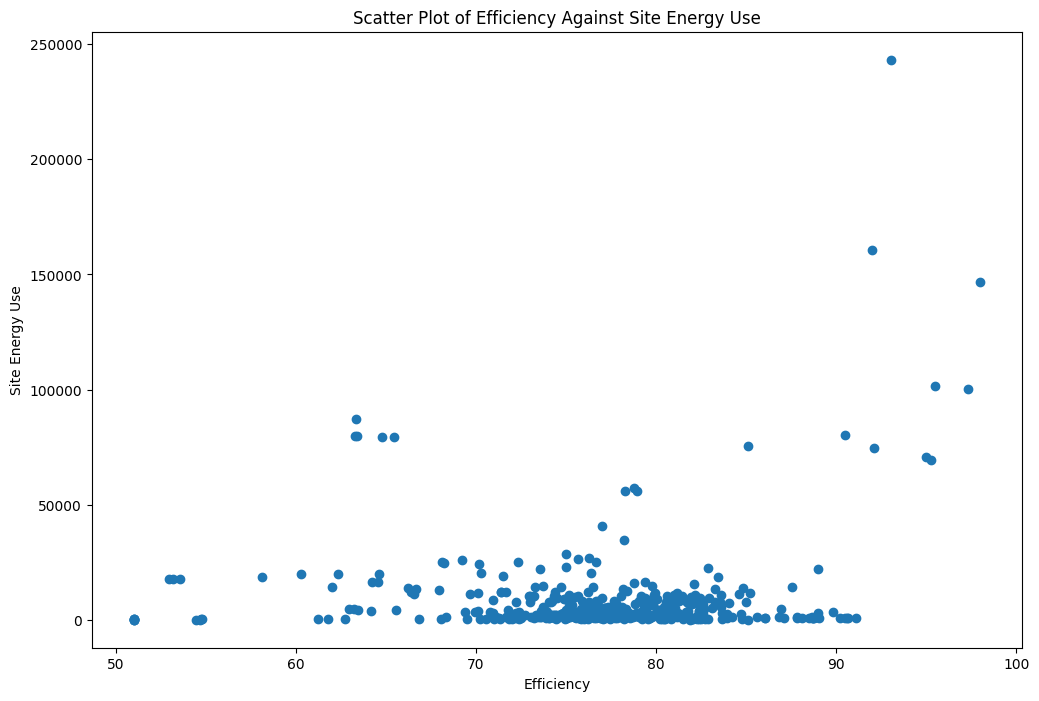

In [62]:
# plot a scatter plot of efficiency against Site Energy Use 

plt.figure(figsize=(12, 8))
plt.scatter(df['efficiency'], df['Site Energy Use (GJ)'])
plt.title("Scatter Plot of Efficiency Against Site Energy Use")
plt.xlabel("Efficiency")
plt.ylabel("Site Energy Use")
plt.show()

The scatter plot above generally shows that most of the energy consumption was less than 25,000 GJ, while most of the efficiencies was between 70% and 85% for consumptions less than 5,0000 GJ, with few exceptions having less than 70% or more than 85%. The very high consumptions (above 50,000 GJ) generally had higher efficiencies of 90% and above, with some exceptions having efficiencies between 60% and 90%.

The plot suggests the buildings with higher energy consumptions have better methods of consuming energy such as using renewable energy sources which reduces emissions.

## Seasonal and property type variations

In [63]:
# Compute the total and direct Greenhouse Gas (GHG) emissions by year

data = df.groupby('Year Ending')[['Total GHG Emissions (Metric Tons CO2e)', 
                          'Direct GHG Emissions (Metric Tons CO2e)']].agg('mean')

data

,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e)
Year Ending,,
2019,474.862626,284.922222
2020,447.357576,245.455556
2021,442.741919,265.240404
2022,446.502020,284.585859
2023,440.078571,329.622449


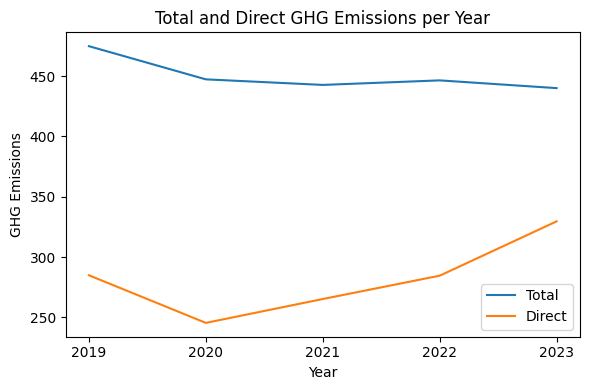

In [64]:
# plot the yearly trend of total and direct Greenhouse Gas (GHG) emissions

plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Total GHG Emissions (Metric Tons CO2e)'])
plt.plot(data.index, data['Direct GHG Emissions (Metric Tons CO2e)'])
plt.xticks(data.index)
plt.title("Total and Direct GHG Emissions per Year")
plt.xlabel("Year")
plt.ylabel("GHG Emissions")
plt.legend(['Total', 'Direct'])
plt.tight_layout()
plt.show()

In [65]:
# Compute the average Site Energy Use by Property Type

data = df.groupby('Primary Property Type - Self Selected')['Site Energy Use (GJ)'].agg('mean').sort_values(ascending = False)
data

Primary Property Type - Self Selected
Distribution Center                                 145310.960000
Fitness Center/Health Club/Gym                       22244.265000
Indoor Arena                                         17991.760000
Ice/Curling Rink                                     11357.834000
Repair Services (Vehicle, Shoe, Locksmith, etc.)     10700.120000
Non-Refrigerated Warehouse                            9875.020000
Office                                                9230.335455
Heated Swimming Pool                                  7716.906667
Self-Storage Facility                                 5755.220000
Social/Meeting Hall                                   3701.160000
Museum                                                3244.140000
Other - Recreation                                    2180.910000
Fire Station                                          1710.029609
Performing Arts                                       1511.020000
Mixed Use Property                    

For total GHG emissions, the plot above shows that 2019 had the highest average GHG emission, with a gradual reduction through the years. For direct GHG emissions, the average GHG emission initially reduced between 2019 and 2020. However, the average GHG emission then went back up gradually through the remaining years. This indicates that the while the direct GHG emissions rose from 2020 to 2023, the indirect GHG emissions must have reduced in those years, since there was also a reduction in total GHG emissions.

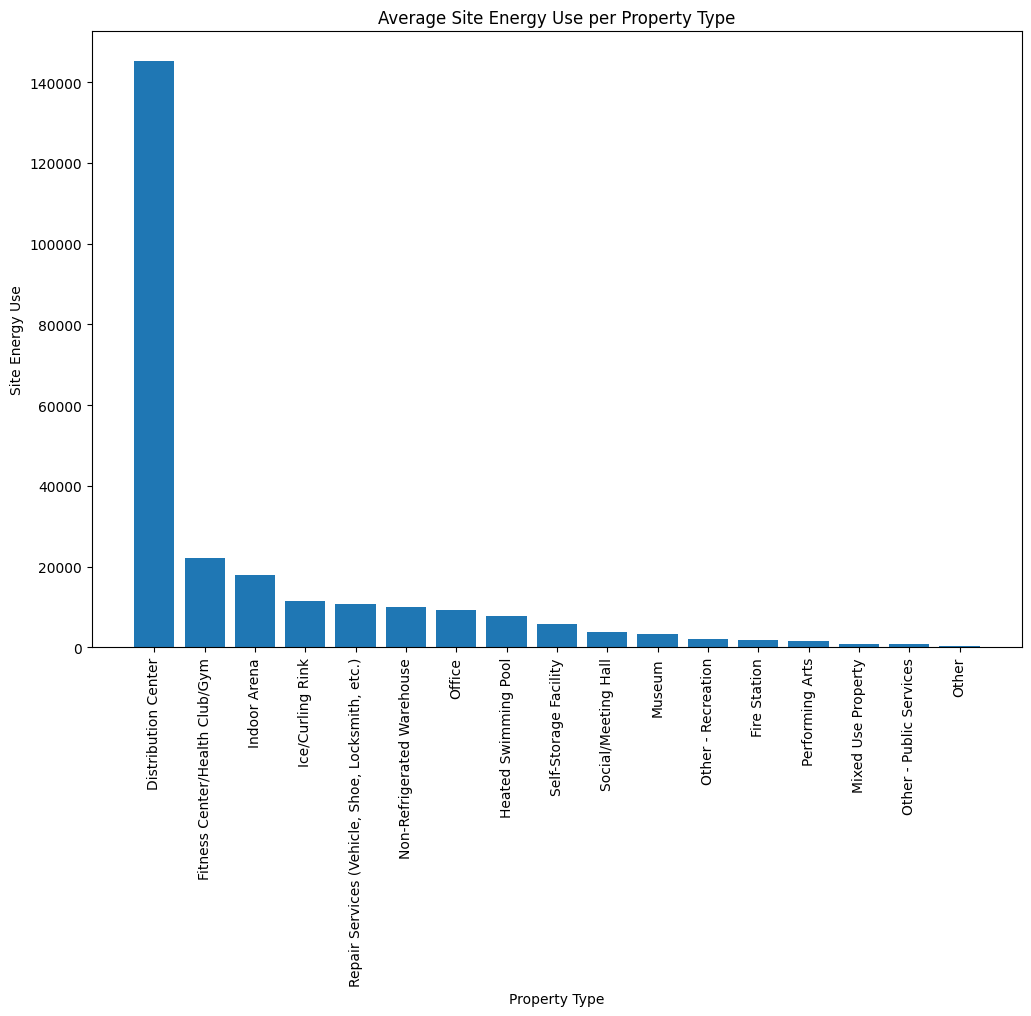

In [66]:
# plot bar chart of average Site Energy Use by Property Type

plt.figure(figsize=(12, 8))
bar = plt.bar(data.index, data.values)
plt.title("Average Site Energy Use per Property Type")
plt.xlabel("Property Type")
plt.ylabel("Site Energy Use")
plt.xticks(rotation = 90)
plt.show()

The bar chart above shows that distribution centers had the highest average consumption of energy. This average consumption was about 7 times more than that of fitness centers/health clubs/gyms which had the second highest average energy consumption. The lowest average energy consumptions came from properties such as fire stations, performing arts, mixed use properties, and others. 